## 전세사기 의심 확인

In [60]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [61]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [62]:
import pandas as pd
import glob
import os

# CSV 파일들이 들어있는 폴더 경로
csv_folder = "data"

# 해당 폴더 내 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# 각 CSV 파일을 읽어서 리스트로 저장
dfs = [pd.read_csv(file, encoding='cp949', skiprows=15) for file in csv_files]

# 병합
df_trade = pd.concat(dfs, ignore_index=True)

In [63]:
# CSV 파일들이 들어있는 폴더 경로
# 서울시부동산실거래가정보
csv_folder = "data2"

# 해당 폴더 내 모든 CSV 파일 경로 가져오기
csv_files2 = glob.glob(os.path.join(csv_folder, "*.csv"))

# 각 CSV 파일을 읽어서 리스트로 저장
dfs2 = [pd.read_csv(file, encoding='cp949') for file in csv_files2]

# 병합
df_trade2 = pd.concat(dfs2, ignore_index=True)

/var/folders/zp/1pcpd5jd2xd5jl9gpvk8f9mw0000gn/T/ipykernel_20205/306677837.py:9: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs2 = [pd.read_csv(file, encoding='cp949') for file in csv_files2]


In [64]:
# 데이터 확인
print(f"병합된 파일 수: {len(csv_files)}")
print(f"총 거래 건수: {len(df_trade)}")
print(f"병합된 파일 수: {len(csv_files2)}")
print(f"총 거래 건수: {len(df_trade2)}")
df_trade.head()

병합된 파일 수: 12
총 거래 건수: 228851
병합된 파일 수: 3
총 거래 건수: 208169


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,중개사소재지,등기일자,주택유형,도로조건,연면적(㎡),대지면적(㎡),매수,매도,건물명,대지권면적(㎡)
0,1,서울특별시 중구 신당동,851,851.00,0.00,래미안하이베르,84.98,202504,14,"134,700",...,서울 중구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,서울특별시 도봉구 방학동,271-1,271.00,1.00,신동아아파트1,53.16,202504,14,"35,800",...,서울 도봉구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,서울특별시 금천구 시흥동,1013,"1,013.00",0.00,관악산벽산타운5,84.97,202504,14,"51,000",...,서울 금천구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,서울특별시 마포구 아현동,777,777.00,0.00,마포래미안푸르지오2단지,59.97,202504,14,"187,000",...,서울 마포구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,서울특별시 마포구 아현동,777,777.00,0.00,마포래미안푸르지오3단지,114.73,202504,14,"242,500",...,서울 마포구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
import pandas as pd
from sqlalchemy import create_engine
from config import DB_CONFIG

engine = create_engine(
    f"mysql+mysqlconnector://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
)
df_origin = pd.read_sql("SELECT * FROM cleaned_house", engine)

In [66]:
df = df_origin

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_id            7575 non-null   int64  
 1   title               7575 non-null   object 
 2   price               7575 non-null   object 
 3   address             7575 non-null   object 
 4   floor               5092 non-null   float64
 5   deposit_type        7575 non-null   object 
 6   management_fee      6280 non-null   float64
 7   available_from      7575 non-null   object 
 8   house_num           7575 non-null   int64  
 9   agent_comm          7557 non-null   float64
 10  agent_info          7575 non-null   object 
 11  rooms_count         7567 non-null   float64
 12  options             7575 non-null   object 
 13  posted_at           7510 non-null   object 
 14  gu                  7575 non-null   object 
 15  dong                7575 non-null   object 
 16  img_ur

In [68]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228851 entries, 0 to 228850
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NO        228851 non-null  int64  
 1   시군구       228851 non-null  object 
 2   번지        228840 non-null  object 
 3   본번        217885 non-null  float64
 4   부번        217885 non-null  float64
 5   단지명       175102 non-null  object 
 6   전용면적(㎡)   217885 non-null  float64
 7   계약년월      228851 non-null  int64  
 8   계약일       228851 non-null  int64  
 9   거래금액(만원)  228851 non-null  object 
 10  동         156581 non-null  object 
 11  층         217885 non-null  float64
 12  매수자       199364 non-null  object 
 13  매도자       199364 non-null  object 
 14  건축년도      228503 non-null  float64
 15  도로명       228741 non-null  object 
 16  해제사유발생일   228851 non-null  object 
 17  거래유형      228851 non-null  object 
 18  중개사소재지    228851 non-null  object 
 19  등기일자      199364 non-null  object 
 20  주택유형

In [69]:
# 월세 -> 전세 변환
# 최종적으로 전세환산금액컬럼으로 전세가율 계산하면 됨!!
# 전월세 구역별 전환율
gu_rate = {
    # 도심권 (5.3%)
    '종로구': 5.3, '중구': 5.3, '용산구': 5.3,
    # 동북권 (5.1%)
    '성동구': 5.1, '광진구': 5.1, '동대문구': 5.1, '중랑구': 5.1,
    '성북구': 5.1, '강북구': 5.1, '도봉구': 5.1, '노원구': 5.1,
    # 서북권 (5.1%)
    '은평구': 5.1, '서대문구': 5.1, '마포구': 5.1,
    # 서남권 (4.8%)
    '양천구': 4.8, '강서구': 4.8, '구로구': 4.8, '금천구': 4.8,
    '영등포구': 4.8, '동작구': 4.8, '관악구': 4.8,
    # 동남권 (4.3%)
    '서초구': 4.3, '강남구': 4.3, '송파구': 4.3, '강동구': 4.3,
}

df['전환율'] = df['gu'].map(gu_rate)

# 월세 환산 전세금 = 보증금 + (월세 * 12 / 전환율)
# 단기임대 처리 어케할지
mask_wolse = (df['deposit_type'] == '월세')
df.loc[mask_wolse, '전세환산금액'] = df.loc[mask_wolse, 'deposit'] + (
    df.loc[mask_wolse, 'monthly_rent'] * 12 / df.loc[mask_wolse, '전환율']
)

# 전세는 기존 보증금 사용
mask_jeonse = df['deposit_type'] == '전세'
df.loc[mask_jeonse, '전세환산금액'] = df.loc[mask_jeonse, 'deposit']

In [70]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [71]:
df['전세환산금액'].sample(10)

3147    52,093,023.26
2679   140,418,604.65
1715    12,455,813.95
1641    11,953,488.37
2802    38,372,093.02
5034   170,279,069.77
1658    53,069,767.44
1487   118,139,534.88
1124    31,841,860.47
6251    42,250,000.00
Name: 전세환산금액, dtype: float64

In [72]:
# 매매가 데이터 int 변환
df_trade['거래금액(만원)'] = (
    df_trade['거래금액(만원)']
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .astype(int)
)

df_trade2['물건금액(만원)'] = (
    df_trade2['물건금액(만원)']
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .astype(int)
)

In [73]:
df_trade2.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [74]:
import re

def parse_area_column(df, col='area_size'):
    def parse_area(area_text):
        try:
            text = str(area_text).strip()
            # '49.9㎡', '80.3㎡/60.2㎡', '-㎡/49.9㎡', 등에서 '㎡' 숫자만 추출
            matches = re.findall(r'([\d.]+)㎡', text)
            if matches:
                return float(matches[-1])
        except:
            pass
        return None

    df = df.copy()
    df['전용면적'] = df[col].apply(parse_area)
    return df

In [75]:
df = parse_area_column(df)

In [76]:
df['전용면적']

0      13.00
1      49.90
2      49.90
3      49.92
4      49.90
        ... 
7570   46.23
7571   22.17
7572   17.96
7573   22.35
7574   21.43
Name: 전용면적, Length: 7575, dtype: float64

## 1단계 : title과 건물명 비교

In [77]:
# df_trade: 건물명 or 단지명
df_trade['건물키'] = df_trade['건물명']
df_trade.loc[df_trade['건물키'].isna() | (df_trade['건물키'].str.strip() == ''), '건물키'] = df_trade['단지명']
df_trade['건물키'] = df_trade['건물키'].fillna('').str.strip()

# df_trade2: 건물명만 사용
df_trade2['건물키'] = df_trade2['건물명'].fillna('').str.strip()

In [78]:
import re

def extract_building_name(title):
    title = str(title)
    title = re.sub(r'\d+동\d+층', '', title)
    title = re.sub(r'\d+동[가-힣]*층', '', title)
    title = re.sub(r'\d+동', '', title)
    title = re.sub(r'\d+층', '', title)
    title = re.sub(r'\([^)]*\)', '', title)
    return title.strip()

df['건물키'] = df['title'].apply(extract_building_name)

In [79]:
df['건물키'].head(10)

0           빌라
1     래미안블레스티지
2     래미안블레스티지
3    개포래미안포레스트
4     래미안블레스티지
5    개포래미안포레스트
6        대치2단지
7    개포래미안포레스트
8     래미안블레스티지
9     래미안블레스티지
Name: 건물키, dtype: object

In [80]:
df_merge1 = df.merge(df_trade, on='건물키', how='left', suffixes=('', '_trade'))
df_merge1['비교면적'] = df_merge1['전용면적(㎡)'].fillna(df_merge1['연면적(㎡)'])
df_merge1['면적차이'] = abs(df_merge1['전용면적'] - df_merge1['비교면적'])
df_filtered1 = df_merge1[df_merge1['면적차이'] <= 1.0].copy()
df_filtered1['매매가'] = df_filtered1['거래금액(만원)'] * 10000

In [81]:
df_merge2 = df.merge(df_trade2, on='건물키', how='left', suffixes=('', '_trade2'))
df_merge2['비교면적'] = df_merge2['건물면적(㎡)']
df_merge2['면적차이'] = abs(df_merge2['전용면적'] - df_merge2['비교면적'])
df_filtered2 = df_merge2[df_merge2['면적차이'] <= 1.0].copy()
df_filtered2['매매가'] = df_filtered2['물건금액(만원)'] * 10000

In [82]:
df_matched = pd.concat([df_filtered1[['title', '매매가']], df_filtered2[['title', '매매가']]])
df_matched = df_matched.dropna().drop_duplicates(subset='title')

In [83]:
df = df.merge(df_matched, on='title', how='left')
df.rename(columns={'매매가': '매매가_1차'}, inplace=True)

In [84]:
df[['건물키', '전용면적', '매매가_1차']].dropna().sample(10, random_state=42)

,건물키,전용면적,매매가_1차
2991,청담자이,49.63,"2,350,000,000.00"
496,논현아이파크,47.46,"1,095,000,000.00"
3091,강일큐브,44.91,"122,000,000.00"
4026,해피하우스,42.83,"245,000,000.00"
358,논현아이파크,47.46,"1,095,000,000.00"
6331,마곡지웰에스테이트,17.44,"98,000,000.00"
3719,올림픽파크포레온,39.98,"1,300,010,000.00"
3872,올림픽파크포레온,39.95,"1,300,010,000.00"
77,래미안블레스티지,49.90,"2,100,000,000.00"
569,논현아이파크,47.46,"1,095,000,000.00"


In [85]:
df['매매가_1차'].isna().sum()

np.int64(6403)

## 2단계 : address에서 추출한 번지수와 번지 컬럼 비교

In [86]:
import re

def extract_full_bunji(text):
    match = re.search(r'(\d+-\d+|\d+)', str(text))
    return match.group(1) if match else None

df['번지'] = df['address'].apply(extract_full_bunji)

In [87]:
# df_trade2 번지수 생성
# 1. 문자열로 만들고 앞뒤 공백 제거
df_trade2['본번'] = df_trade2['본번'].astype(str).str.strip()
df_trade2['부번'] = df_trade2['부번'].astype(str).str.strip()

# 2. 숫자만 추출 (문자 제거), NaN이나 공백은 '0'으로
df_trade2['본번'] = df_trade2['본번'].str.extract(r'(\d+)')[0].fillna('0')
df_trade2['부번'] = df_trade2['부번'].str.extract(r'(\d+)')[0].fillna('0')

# 3. 정수로 변환 후 문자열로 변환 (leading zero 제거)
df_trade2['본번'] = df_trade2['본번'].astype(int).astype(str)
df_trade2['부번'] = df_trade2['부번'].astype(int).astype(str)

In [88]:
df_trade2['번지'] = df_trade2['본번'].astype(str) + '-' + df_trade2['부번'].astype(str)

In [89]:
df_trade2['번지'].sample(10)

196162    583-0
146651    414-8
89798      15-1
150376    941-0
5087      495-9
174835      0-0
52888     717-0
86165     340-0
118065    901-0
101301    74-12
Name: 번지, dtype: object

In [90]:
df['번지'] = df['번지'].astype(str).str.strip()
df_trade['번지'] = df_trade['번지'].astype(str).str.strip()
df_trade2['번지'] = df_trade2['번지'].astype(str).str.strip()

In [91]:
df_merge_b1 = df.merge(df_trade, on='번지', how='left')
df_merge_b1['비교면적'] = df_merge_b1['전용면적(㎡)'].fillna(df_merge_b1['연면적(㎡)'])
df_merge_b1['면적차이'] = abs(df_merge_b1['전용면적'] - df_merge_b1['비교면적'])
df_filtered_b1 = df_merge_b1[df_merge_b1['면적차이'] <= 1.0].copy()
df_filtered_b1['매매가_2차'] = df_filtered_b1['거래금액(만원)'] * 10000

In [92]:
df_merge_b2 = df.merge(df_trade2, on='번지', how='left')
df_merge_b2['비교면적'] = df_merge_b2['건물면적(㎡)']
df_merge_b2['면적차이'] = abs(df_merge_b2['전용면적'] - df_merge_b2['비교면적'])
df_filtered_b2 = df_merge_b2[df_merge_b2['면적차이'] <= 1.0].copy()
df_filtered_b2['매매가_2차'] = df_filtered_b2['물건금액(만원)'] * 10000

In [93]:
df_bunji_matched = pd.concat([
    df_filtered_b1[['title', '매매가_2차']],
    df_filtered_b2[['title', '매매가_2차']]
]).dropna().drop_duplicates(subset='title')

# 기존 df에 병합
df = df.merge(df_bunji_matched, on='title', how='left')

In [94]:
print(df[['title', '전용면적', '번지', '매매가_2차']].dropna().sample(10))

             title  전용면적      번지         매매가_2차
3506        일반원룸4층 23.10   144-7 250,000,000.00
5088          빌라고층 21.41   25-22 450,000,000.00
2402        일반원룸2층 26.00  638-14  93,000,000.00
440           빌라5층 22.56   193-4 400,000,000.00
1146         다가구1층 37.00  948-12  99,000,000.00
5535         단독B1층 23.14  121-35 244,000,000.00
4649          빌라3층 29.89  407-29 535,000,000.00
4977        일반원룸3층 36.30  504-13 240,000,000.00
3482  일반원룸 다성이즈빌7층 17.20   349-1 135,000,000.00
4076         다가구1층 40.00  312-29  99,000,000.00


In [95]:
df['매매가_2차'].isna().sum() # 번지수로 매칭되지 않은 데이터 : 21812개

np.int64(4145)

In [96]:
null_rows = df[df['매매가_1차'].isna() & df['매매가_2차'].isna()]
print("매매가_1차, 2차 모두 NaN인 행 개수:", len(null_rows)) # 매매가 안 채워진 데이터

매매가_1차, 2차 모두 NaN인 행 개수: 2974


## 3단계 : building_type별, 동별 평균 매매가 계산

In [97]:
# df_trade 평균 거래가
# 시군구 컬럼 분리
df_trade[['시', '자치구명', '법정동명']] = df_trade['시군구'].str.split(' ', n=2, expand=True)
df_trade['법정동명'] = df_trade['법정동명'].str.split(' ').str[0]
df_trade['거래금액(만원)'] = df_trade['거래금액(만원)'].replace(',', '', regex=True).astype(float)

In [98]:
avg_trade = df_trade.groupby(['자치구명', '법정동명'])['거래금액(만원)'].mean().reset_index()
avg_trade.columns = ['gu', 'dong', '평균거래금액(만원)']

In [99]:
# df_trade2 평균 거래가
avg_price = df_trade2.groupby(['자치구명', '법정동명'])['물건금액(만원)'].mean().reset_index()
avg_price.columns = ['gu', 'dong', '평균물건금액(만원)']

In [100]:
# df_trade 평균 + df_trade2 평균
df_merged = pd.concat([
    df_trade2[['자치구명', '법정동명', '물건금액(만원)']].rename(columns={'물건금액(만원)': '거래금액(만원)'}),
    df_trade[['자치구명', '법정동명', '거래금액(만원)']]
])

# 다시 평균 계산
avg_combined = df_merged.groupby(['자치구명', '법정동명'])['거래금액(만원)'].mean().reset_index()
avg_combined.columns = ['gu', 'dong', '평균거래금액_만원']
avg_combined['평균거래금액_만원'] *= 10000

In [101]:
df[['dong', 'gu']]

,dong,gu
0,개포동,강남구
1,개포동,강남구
2,개포동,강남구
3,개포동,강남구
4,개포동,강남구
...,...,...
7570,마곡동,강서구
7571,마곡동,강서구
7572,마곡동,강서구
7573,마곡동,강서구


In [102]:
df = df.merge(avg_combined, how='left', on=['gu', 'dong'])

In [103]:
df[['gu', 'dong', '평균거래금액_만원']].sample(10)

,gu,dong,평균거래금액_만원
5813,강북구,번동,"348,576,215.31"
3945,강동구,둔촌동,"1,096,554,698.87"
7315,강서구,마곡동,"544,167,589.45"
1342,강남구,삼성동,"2,080,027,783.06"
4456,강동구,성내동,"614,303,017.05"
2030,강남구,역삼동,"1,279,386,757.10"
999,강남구,도곡동,"2,528,266,193.85"
1037,강남구,도곡동,"2,528,266,193.85"
6366,강서구,가양동,"664,772,940.43"
2227,강남구,역삼동,"1,279,386,757.10"


In [104]:
# 1차, 2차가 모두 NaN인 행에 평균거래금액_만원을 매매가_3차에 대입
condition = df['매매가_1차'].isna() & df['매매가_2차'].isna()

df.loc[condition, '매매가_3차'] = df.loc[condition, '평균거래금액_만원']

In [105]:
df[['title', '전용면적', '번지', '매매가_1차', '매매가_2차', '매매가_3차']].sample(10)

,title,전용면적,번지,매매가_1차,매매가_2차,매매가_3차
6862,단독B1층,18.18,697-8,NaN,"244,000,000.00",NaN
4055,세종프라자 1동고층,46.80,None,NaN,NaN,"1,042,112,559.92"
6406,단독 201호2층,46.07,None,NaN,NaN,"664,772,940.43"
3228,빌라고층,29.66,531,NaN,"450,000,000.00",NaN
6983,아리움205(민간임대) 1동9층,26.63,None,NaN,NaN,"531,838,394.70"
524,다가구B1층,33.60,262-2,NaN,"132,000,000.00",NaN
2714,강남푸르지오시티2차 1동고층,21.59,None,NaN,NaN,"973,220,620.35"
4200,빌라7층,34.17,305-9,NaN,"120,000,000.00",NaN
4223,빌라중층,42.83,337-9,NaN,"172,000,000.00",NaN
96,빌라중층,26.61,171-8,NaN,"172,000,000.00",NaN


## 4단계 : 전세가율 계산

In [106]:
df['전세환산금액'] = df['전세환산금액'].astype(float)

In [107]:
df['매매가_최종'] = df['매매가_1차'].combine_first(df['매매가_2차']).combine_first(df['매매가_3차'])
df['전세가율'] = df['전세환산금액'] / df['매매가_최종']
df['전세가율_이상'] = df['전세가율'] > 0.8

In [108]:
df['전세가율_이상'].sum()

np.int64(740)

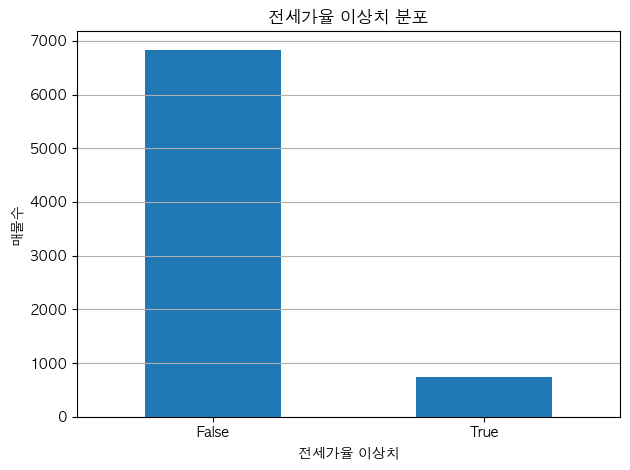

In [109]:
import matplotlib.pyplot as plt

# True/False 개수 집계
counts = df['전세가율_이상'].value_counts()

# 시각화
counts.plot(kind='bar')
plt.title('전세가율 이상치 분포')
plt.xlabel('전세가율 이상치')
plt.ylabel('매물수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [110]:
df[(df['전세가율_이상'] == True) & (df['매매가_3차'].notna())].shape[0]

50

In [111]:
import sqlite3

# ✅ 1. 병합 키 생성 (전세 df와 전체 df 모두)
df['매칭키'] = df['title'].astype(str).str.strip() + '_' + df['house_explanations'].astype(str) + '_' + df['options'].astype(str) + '_' + df['house_feature'].astype(str) + '_' + df['house_num'].astype(str) + '_' + df['agent_info'].astype(str) + '_' + df['posted_at'].astype(str) + '_' + df['house_id'].astype(str)
df_origin['매칭키'] = df_origin['title'].astype(str).str.strip() + '_' + df_origin['house_explanations'].astype(str) + '_' + df_origin['options'].astype(str) + '_' + df_origin['house_feature'].astype(str) + '_' + df_origin['house_num'].astype(str) + '_' + df['agent_info'].astype(str) + '_' + df['posted_at'].astype(str) + '_' + df['house_id'].astype(str)

# ✅ 2. 전세 매물의 전세가율_이상 정보만 추출
jeonse_flag = df[['매칭키', '전세가율_이상']]

# 병합하기 전에 매칭키 기준으로 중복 제거
df_unique = df[['매칭키', '전세가율_이상']].drop_duplicates(subset='매칭키')


In [112]:
df.columns

Index(['house_id', 'title', 'price', 'address', 'floor', 'deposit_type',
       'management_fee', 'available_from', 'house_num', 'agent_comm',
       'agent_info', 'rooms_count', 'options', 'posted_at', 'gu', 'dong',
       'img_url', 'area_size', 'direction', 'built_date', 'parking',
       'building_type', 'house_feature', 'house_explanations', 'safety_grade',
       'deposit', 'monthly_rent', 'space', 'bath_count', 'total_floor',
       'latitude', 'longitude', 'final_embedding', 'gpt_description',
       'safety_score', '전환율', '전세환산금액', '전용면적', '건물키', '매매가_1차', '번지',
       '매매가_2차', '평균거래금액_만원', '매매가_3차', '매매가_최종', '전세가율', '전세가율_이상', '매칭키'],
      dtype='object')

In [122]:
# ✅ 3. 전체 데이터에 병합 (left join: 기존 df_origin 유지)
df_total = df_origin.merge(jeonse_flag, on='매칭키', how='left')

In [123]:
# ✅ 4. 병합 후 필요 없어진 매칭키 컬럼 제거
df_total.drop(['매칭키', '전환율'], axis=1, inplace=True)

# ✅ 5. SQLite DB로 저장
output_path = 'real_estate_with_fflag.db'
conn = sqlite3.connect(output_path)
df_total.to_sql('house', conn, index=False, if_exists='replace')
conn.close()

print("전세가율_이상 병합 완료 및 DB 저장 완료")

전세가율_이상 병합 완료 및 DB 저장 완료
